In [ ]:
#        Interpreting Node Embedding with Text-Labeled Graphs
      
#   File:     results_evaluation.ipynb 
#   Authors:  Giuseppe Serra - giuseppe.serra@neclab.eu | gxs824@student.bham.ac.uk
#             Zhao Xu - zhao.xu@neclab.eu

# NEC Laboratories Europe GmbH, Copyright (c) <year>, All rights reserved.  

#        THIS HEADER MAY NOT BE EXTRACTED OR MODIFIED IN ANY WAY.
 
#        PROPRIETARY INFORMATION ---  

# SOFTWARE LICENSE AGREEMENT

# ACADEMIC OR NON-PROFIT ORGANIZATION NONCOMMERCIAL RESEARCH USE ONLY

# BY USING OR DOWNLOADING THE SOFTWARE, YOU ARE AGREEING TO THE TERMS OF THIS
# LICENSE AGREEMENT.  IF YOU DO NOT AGREE WITH THESE TERMS, YOU MAY NOT USE OR
# DOWNLOAD THE SOFTWARE.

# This is a license agreement ("Agreement") between your academic institution
# or non-profit organization or self (called "Licensee" or "You" in this
# Agreement) and NEC Laboratories Europe GmbH (called "Licensor" in this
# Agreement).  All rights not specifically granted to you in this Agreement
# are reserved for Licensor. 

# RESERVATION OF OWNERSHIP AND GRANT OF LICENSE: Licensor retains exclusive
# ownership of any copy of the Software (as defined below) licensed under this
# Agreement and hereby grants to Licensee a personal, non-exclusive,
# non-transferable license to use the Software for noncommercial research
# purposes, without the right to sublicense, pursuant to the terms and
# conditions of this Agreement. NO EXPRESS OR IMPLIED LICENSES TO ANY OF
# LICENSOR'S PATENT RIGHTS ARE GRANTED BY THIS LICENSE. As used in this
# Agreement, the term "Software" means (i) the actual copy of all or any
# portion of code for program routines made accessible to Licensee by Licensor
# pursuant to this Agreement, inclusive of backups, updates, and/or merged
# copies permitted hereunder or subsequently supplied by Licensor,  including
# all or any file structures, programming instructions, user interfaces and
# screen formats and sequences as well as any and all documentation and
# instructions related to it, and (ii) all or any derivatives and/or
# modifications created or made by You to any of the items specified in (i).

# CONFIDENTIALITY/PUBLICATIONS: Licensee acknowledges that the Software is
# proprietary to Licensor, and as such, Licensee agrees to receive all such
# materials and to use the Software only in accordance with the terms of this
# Agreement.  Licensee agrees to use reasonable effort to protect the Software
# from unauthorized use, reproduction, distribution, or publication. All
# publication materials mentioning features or use of this software must
# explicitly include an acknowledgement the software was developed by NEC
# Laboratories Europe GmbH.

# COPYRIGHT: The Software is owned by Licensor.  

# PERMITTED USES:  The Software may be used for your own noncommercial
# internal research purposes. You understand and agree that Licensor is not
# obligated to implement any suggestions and/or feedback you might provide
# regarding the Software, but to the extent Licensor does so, you are not
# entitled to any compensation related thereto.

# DERIVATIVES: You may create derivatives of or make modifications to the
# Software, however, You agree that all and any such derivatives and
# modifications will be owned by Licensor and become a part of the Software
# licensed to You under this Agreement.  You may only use such derivatives and
# modifications for your own noncommercial internal research purposes, and you
# may not otherwise use, distribute or copy such derivatives and modifications
# in violation of this Agreement.

# BACKUPS:  If Licensee is an organization, it may make that number of copies
# of the Software necessary for internal noncommercial use at a single site
# within its organization provided that all information appearing in or on the
# original labels, including the copyright and trademark notices are copied
# onto the labels of the copies.

# USES NOT PERMITTED:  You may not distribute, copy or use the Software except
# as explicitly permitted herein. Licensee has not been granted any trademark
# license as part of this Agreement.  Neither the name of NEC Laboratories
# Europe GmbH nor the names of its contributors may be used to endorse or
# promote products derived from this Software without specific prior written
# permission.

# You may not sell, rent, lease, sublicense, lend, time-share or transfer, in
# whole or in part, or provide third parties access to prior or present
# versions (or any parts thereof) of the Software.

# ASSIGNMENT: You may not assign this Agreement or your rights hereunder
# without the prior written consent of Licensor. Any attempted assignment
# without such consent shall be null and void.

# TERM: The term of the license granted by this Agreement is from Licensee's
# acceptance of this Agreement by downloading the Software or by using the
# Software until terminated as provided below.  

# The Agreement automatically terminates without notice if you fail to comply
# with any provision of this Agreement.  Licensee may terminate this Agreement
# by ceasing using the Software.  Upon any termination of this Agreement,
# Licensee will delete any and all copies of the Software. You agree that all
# provisions which operate to protect the proprietary rights of Licensor shall
# remain in force should breach occur and that the obligation of
# confidentiality described in this Agreement is binding in perpetuity and, as
# such, survives the term of the Agreement.

# FEE: Provided Licensee abides completely by the terms and conditions of this
# Agreement, there is no fee due to Licensor for Licensee's use of the
# Software in accordance with this Agreement.

# DISCLAIMER OF WARRANTIES:  THE SOFTWARE IS PROVIDED "AS-IS" WITHOUT WARRANTY
# OF ANY KIND INCLUDING ANY WARRANTIES OF PERFORMANCE OR MERCHANTABILITY OR
# FITNESS FOR A PARTICULAR USE OR PURPOSE OR OF NON- INFRINGEMENT.  LICENSEE
# BEARS ALL RISK RELATING TO QUALITY AND PERFORMANCE OF THE SOFTWARE AND
# RELATED MATERIALS.

# SUPPORT AND MAINTENANCE: No Software support or training by the Licensor is
# provided as part of this Agreement.  

# EXCLUSIVE REMEDY AND LIMITATION OF LIABILITY: To the maximum extent
# permitted under applicable law, Licensor shall not be liable for direct,
# indirect, special, incidental, or consequential damages or lost profits
# related to Licensee's use of and/or inability to use the Software, even if
# Licensor is advised of the possibility of such damage.

# EXPORT REGULATION: Licensee agrees to comply with any and all applicable
# export control laws, regulations, and/or other laws related to embargoes and
# sanction programs administered by law.

# SEVERABILITY: If any provision(s) of this Agreement shall be held to be
# invalid, illegal, or unenforceable by a court or other tribunal of competent
# jurisdiction, the validity, legality and enforceability of the remaining
# provisions shall not in any way be affected or impaired thereby.

# NO IMPLIED WAIVERS: No failure or delay by Licensor in enforcing any right
# or remedy under this Agreement shall be construed as a waiver of any future
# or other exercise of such right or remedy by Licensor.

# GOVERNING LAW: This Agreement shall be construed and enforced in accordance
# with the laws of Germany without reference to conflict of laws principles.
# You consent to the personal jurisdiction of the courts of this country and
# waive their rights to venue outside of Germany.

# ENTIRE AGREEMENT AND AMENDMENTS: This Agreement constitutes the sole and
# entire agreement between Licensee and Licensor as to the matter set forth
# herein and supersedes any previous agreements, understandings, and
# arrangements between the parties relating hereto.

#        THIS HEADER MAY NOT BE EXTRACTED OR MODIFIED IN ANY WAY.


# -*- coding: utf-8 -*-

In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import math 
from collections import Counter
from gensim.models.keyedvectors import KeyedVectors
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import random
from random import sample
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import utils
plt.style.use('seaborn')
%matplotlib inline

[nltk_data] Downloading package stopwords to /home/gserra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
DIR_TRAIN_TEST_DATA = utils.DIR_TRAIN_TEST_DATA
DIR_PREPROCESSED_DATA = utils.DIR_PREPROCESSED_DATA
DIR_RESULTS = utils.DIR_RESULTS

# K-core and category selection
K = utils.K
name_core = str(K) + 'core'
categories = utils.CATEGORIES
name_arch = 'iGNN'

In [3]:
for category in categories:
    print 'Processing category:', category

    DIR_TRAIN_TEST_DATA_c = DIR_TRAIN_TEST_DATA + '/' + category + '/' + name_core
    DIR_RESULTS_c = DIR_RESULTS + '/' + category + '/' + name_core + '/' + name_arch
    DIR_PREPROCESSED_DATA_c = DIR_PREPROCESSED_DATA + '/' + category + '/' + name_core
    
    beta = pickle.load(open(DIR_RESULTS_c + '/beta.pkl', 'rb'))
    z_users = pickle.load(open(DIR_RESULTS_c + '/z_users.pkl', 'rb'))
    z_prods = pickle.load(open(DIR_RESULTS_c + '/z_prods.pkl', 'rb'))
    keywords_inv_map = pickle.load(open(DIR_PREPROCESSED_DATA_c + '/keywords_inv_map.pkl', 'rb'))
    num_users, num_cluster_users = z_users.shape
    num_prods, num_cluster_prods = z_prods.shape
    words_test = pickle.load(open(DIR_TRAIN_TEST_DATA_c + '/words_test.pkl', 'rb'))
    words_train = pickle.load(open(DIR_TRAIN_TEST_DATA_c + '/words_train.pkl', 'rb'))

Processing category: patio


In [4]:
def get_words_dist(index, beta_mat, z_dist, num_cu, num_cp, group='users'):
    if group == 'users':
        z_user = z_dist[index]
        z_prod = 1. / num_cp
        k_users = np.repeat(np.array(range(num_cu)), num_cp)

        beta_user_tem = beta_mat * z_prod
        beta_user = np.multiply(np.reshape([z_user[idx] for idx in k_users], (num_cu*num_cp, 1)), beta_user_tem)
        words_dist = sum(beta_user) 
        # top_k = [k[1] for k in sorted(zip(words_dist, keywords_inv_map.keys()), reverse = True)[:num_kw]]
        
    else:
        z_prod = z_dist[index]
        z_user = 1. / num_cu
        k_prods = np.tile(np.array(range(num_cp)), num_cu)

        beta_prod_tem = beta_mat * z_user
        beta_prod = np.multiply(np.reshape([z_prod[idx] for idx in k_prods], (num_cu*num_cp, 1)), beta_prod_tem)
        words_dist = sum(beta_prod) 
         #top_k = [k[1] for k in sorted(zip(words_dist, keywords_inv_map.keys()), reverse = True)[:num_kw]]

    return words_dist

def get_kw_user(idx, inverse_map, reviews_list):
    keywords_user = []

    for review in reviews_list:
        user_id = review[0]
        kw_list = review[2]

        if inverse_map[idx] == user_id:
            keywords_user.extend(kw_list)
            
    return set(keywords_user)

def get_kw_prod(idx, inverse_map, reviews_list):
    keywords_prod = []

    for review in reviews_list:
        prod_id = review[1]
        kw_list = review[2]

        if inverse_map[idx] == prod_id:
            keywords_prod.extend(kw_list)
            
    return set(keywords_prod)

def get_kw_from_idx(idx, kw_inv_map):
    top_words = [kw_inv_map[k] for k in idx]
    return sorted(top_words)

def get_keywords_from_dist(words_dist, keywords_inv_map, num_words = 15):
    top_k = [k[1] for k in sorted(zip(words_dist, keywords_inv_map.keys()), reverse = True)[:num_words]]
    return top_k

In [5]:
words_dist_user = get_words_dist(2, beta, z_users, num_cluster_users, num_cluster_prods)
top_words_user_idx = get_keywords_from_dist(words_dist_user, keywords_inv_map)
top_words_user = get_kw_from_idx(top_words_user_idx, keywords_inv_map)
texts = {idx: words_dist_user[idx] for idx in top_words_user_idx}

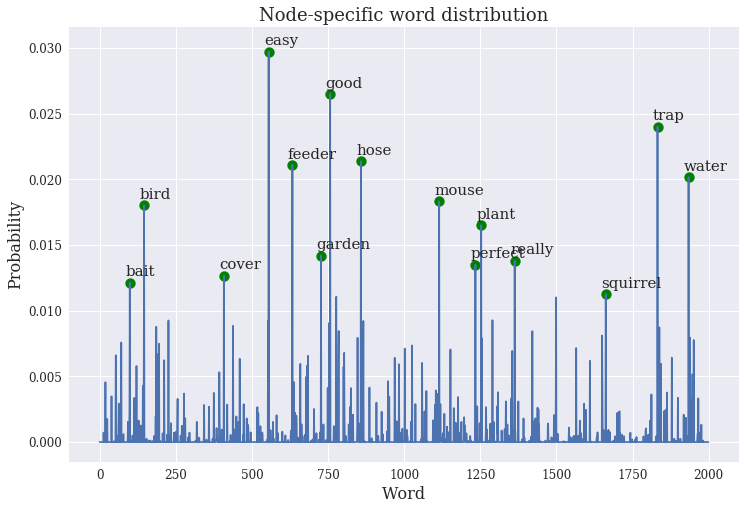

[u'bait', u'bird', u'cover', u'easy', u'feeder', u'garden', u'good', u'hose', u'mouse', u'perfect', u'plant', u'really', u'squirrel', u'trap', u'water']


In [13]:
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 22

plt.rc('font', family='serif')
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.figure(figsize=(12,8))
plt.plot(words_dist_user)
# plt.xticks(top_words_prod_idx, top_words_prod_idx, rotation = 70)
plt.legend()
plt.title('Node-specific word distribution')
plt.xlabel('Word')
plt.ylabel('Probability')

plt.scatter(texts.keys(), texts.values(), s=100, c='green', marker='o')
for k,v in texts.iteritems():
    
    k_idx = k - 15
    v_idx = v + 0.0005
    plt.text(k_idx, v_idx, get_kw_from_idx([k], keywords_inv_map)[0], fontsize=15, rotation = 0)

# plt.savefig('distr_u_'+category+'_'+ str(5348)+'.eps', format='eps', dpi=1200)    
plt.show()

print top_words_user

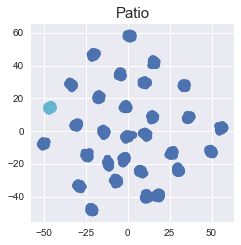

In [14]:
plt.style.use('seaborn')
categories = ['Patio']    
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
fig = plt.figure(figsize=(8,8))

for i, category in enumerate(categories):
    DIR_RESULTS_c = DIR_RESULTS + '/' + category.lower() + '/' + name_core + '/' + name_arch
    beta = pickle.load(open(DIR_RESULTS_c + '/beta.pkl', 'rb'))
    X_transformed = TSNE(n_components=2, init='pca', random_state=0).fit_transform(beta)
    plt.subplot(2, 2, i+1)
    plt.rc('font', family='serif')
    
    coords = [-55, -40, 0, 20] # coordinates to select a specific cluster in the picture
    col = np.where((((X_transformed[:,0] > coords[0]) & (X_transformed[:,0] < coords[1])) & \
                ((X_transformed[:,1] > coords[2]) & (X_transformed[:,1] < coords[3]))), colors[5], colors[0])
    plt.scatter(X_transformed[:,0],X_transformed[:,1], color=col)
    plt.title(category, fontsize=15)

plt.show()

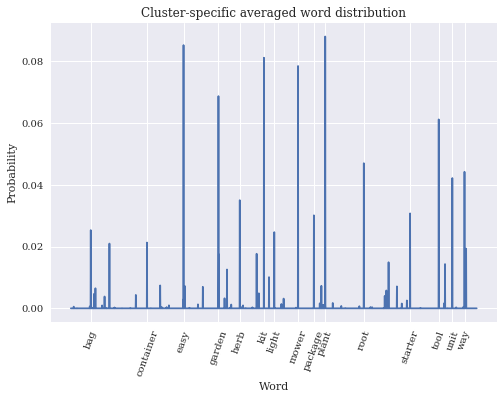

[u'plant', u'easy', u'kit', u'mower', u'garden', u'tool', u'root', u'way', u'unit', u'herb', u'starter', u'package', u'bag', u'light', u'container']


In [18]:
beta_dist = np.mean(beta[((X_transformed[:,0] > coords[0]) & (X_transformed[:,0] < coords[1])) & \
                        ((X_transformed[:,1] > coords[2]) & (X_transformed[:,1] < coords[3]))], axis=0)
plt.plot(beta_dist)
top_k = [k[1] for k in sorted(zip(beta_dist, keywords_inv_map.keys()), reverse = True)[:15]]
top_words = [keywords_inv_map[k] for k in top_k]
plt.xticks(top_k, top_words , rotation = 70)
plt.legend()
plt.title('Cluster-specific averaged word distribution')
plt.xlabel('Word')
plt.ylabel('Probability')
plt.show()

print top_words

In [ ]:
def unit_overlapping(x, y):
    set_x = set(x)
    set_y = set(y)
    inter_xy = set_x.intersection(set_y)
    
    denominator = len(set_x) + len(set_y) - len(inter_xy)
    score = len(inter_xy) * 1. / denominator
    
    return score

def jaccard_similarity(x, y):
    set_x = set(x)
    set_y = set(y)
    inter_xy = set_x.intersection(set_y)
    union_xy = set_x.union(set_y)
    
    score = len(inter_xy) * 1. / len(union_xy)
    
    return score

def min_max_scaler(input_dict, metric = 'wdm'):
    values = input_dict.values()
    min_list = min(values)
    max_list = max(values)
    den = max_list - min_list
    
    output_dict = {}
    if metric == 'wdm':
        for k, v in input_dict.iteritems():
            inverted_score = 1 - (v - min_list)/den
            output_dict[k] = inverted_score

    else:
        for k, v in input_dict.iteritems():
            inverted_score = (v - min_list)/den
            output_dict[k] = inverted_score
            
    return output_dict

In [ ]:
warnings.filterwarnings('ignore')
scores_u = {}
distances_u = {}
for idx in range(len(users_map)):
    
    words_dist_u = get_words_dist(idx, beta, z_u_dist, num_user_clusters, num_prod_clusters)
    a = get_keywords_from_dist(words_dist_u, keywords_inv_map)
    b = get_kw_user(idx, users_inv_map, reviews_keywordslist)
    words_a = get_kw_from_idx(a, keywords_inv_map)
    words_b = get_kw_from_idx(b, keywords_inv_map)

    score = jaccard_similarity(a, b)
    distance = model.wmdistance(words_a, words_b)
    scores_u[idx] = score
    distances_u[idx] = distance
    
distances_users = min_max_scaler(distances_u)
scores_users = min_max_scaler(scores_u, 'jaccard')

# computing the scores might be time consuming, it would be better to save them after computation
# then load them and use them at your convenience

In [ ]:
warnings.filterwarnings('ignore')
scores_p = {}
distances_p = {}
for idx in range(len(products_map)):
    
    words_dist_p = get_words_dist(idx, beta, z_p_dist, num_user_clusters, num_prod_clusters, 'prods')
    a = get_keywords_from_dist(words_dist_p, keywords_inv_map)
    b = get_kw_prod(idx, prods_inv_map, reviews_keywordslist)
    words_a = get_kw_from_idx(a, keywords_inv_map)
    words_b = get_kw_from_idx(b, keywords_inv_map)
    
    score = jaccard_similarity(a, b)
    distance = model.wmdistance(words_a, words_b)
    scores_p[idx] = score
    distances_p[idx] = distance
    
scores_prods = pickle.load(open('scores_prod_'+ category +'.pkl', "r"))
distances_prods = pickle.load(open('distances_prod_'+ category +'.pkl', "r"))